In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import re


### Load Data

In [59]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [60]:
test = pd.read_csv("test.csv")
test_id = test['PassengerId']

In [61]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
data.set_index(data.PassengerId, inplace = True)

In [63]:
data.drop("PassengerId", axis = 1, inplace = True)

In [64]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Classification

In [65]:
features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

def convert_category(data, features):
  for feature in features:
    data[feature] = data[feature].astype('category')
  return data

In [66]:
convert_category(data, features)
convert_category(test, features)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
data['Survived'] = data['Survived'].astype('category')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Data Distribution

In [69]:
data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [70]:
data.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Exploratory Data Analysis

#### Survived

In [71]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

#### Sex

In [72]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

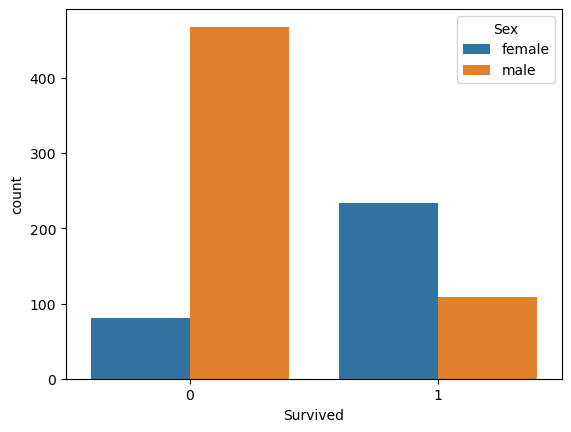

In [73]:
sns.countplot(x = "Survived", data = data, hue = "Sex")

#### Age

<Axes: xlabel='Age', ylabel='Count'>

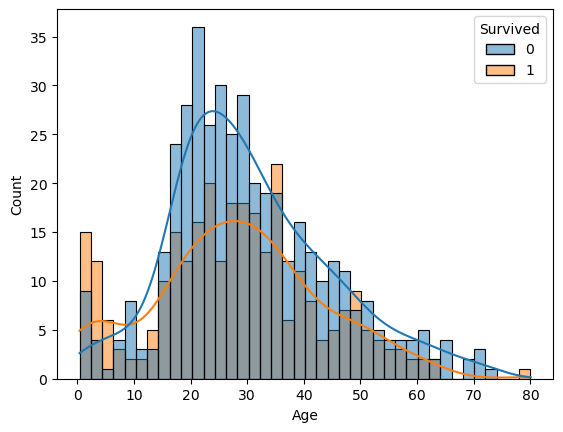

In [74]:
sns.histplot(data = data, x = 'Age', hue = 'Survived', bins = 40, kde = True)

#### Fare

In [75]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

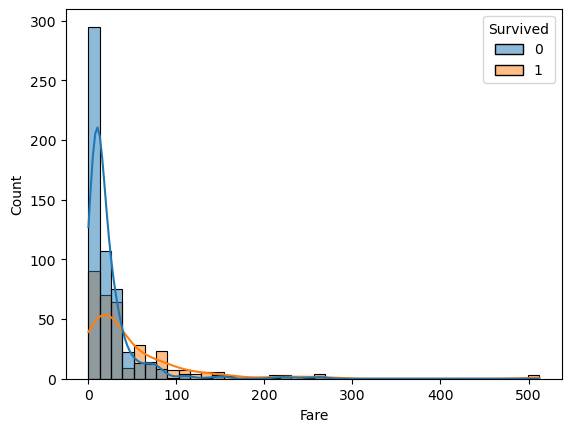

In [76]:
sns.histplot(x = 'Fare', data = data, hue = 'Survived', bins = 40, kde = True )

In [77]:
fare_categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']
fare_qcut_data = pd.qcut(data['Fare'], 4, labels = fare_categories)

<Axes: xlabel='Fare', ylabel='count'>

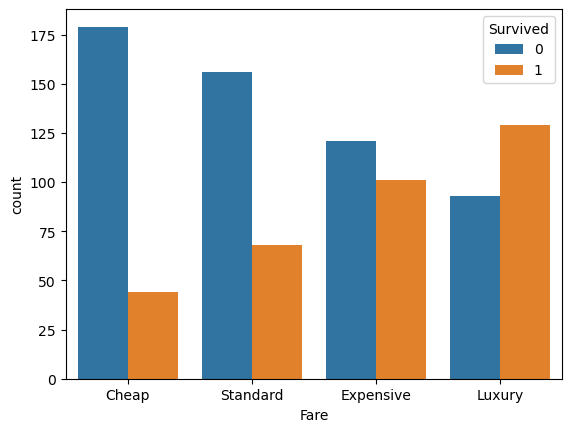

In [78]:
sns.countplot(x = fare_qcut_data, hue = data['Survived'] )

### Feature Engineering and Data Wrangling

#### Name

In [79]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [80]:
def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

data['Title'] = data['Name'].apply(lambda name: extract_title(name))
test['Title'] = test['Name'].apply(lambda name: extract_title(name))
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [81]:
data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [82]:
def group_title(title):
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'
data['Title'] = data['Title'].apply(lambda title: group_title(title))
test['Title'] = test['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

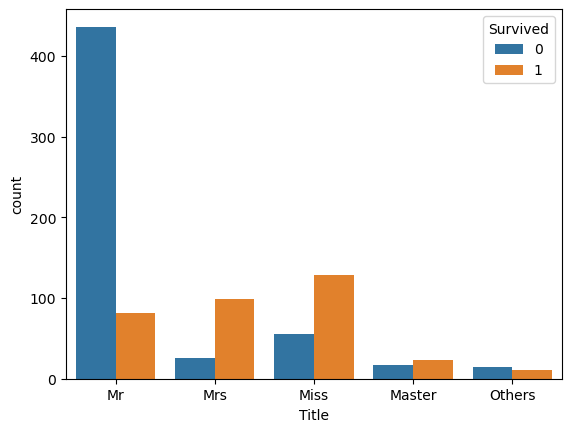

In [83]:
sns.countplot(x='Title', data=data, hue = 'Survived')

#### Family

In [84]:
data['Family_size'] = data['SibSp'].astype('int') + data['Parch'].astype('int') + 1
test['Family_size'] = test['SibSp'].astype('int') + test['Parch'].astype('int') + 1

<Axes: xlabel='Family_size', ylabel='count'>

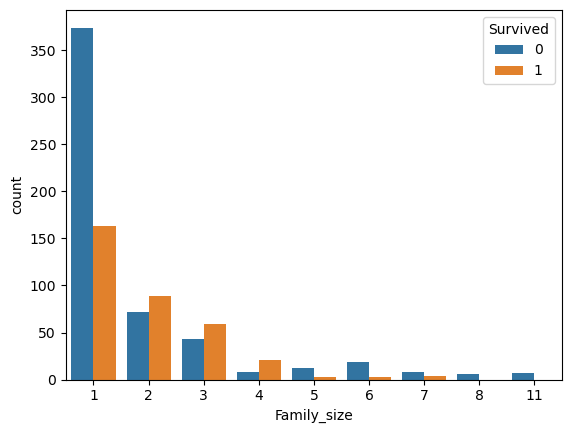

In [85]:
sns.countplot(x = 'Family_size', data = data, hue = 'Survived')

In [86]:
data['Family_category'] = pd.cut(data['Family_size'], bins =[0,1,4,6,20], labels = ['Solo', 'Small','Medium', 'Big'])
test['Family_category'] = pd.cut(test['Family_size'], bins =[0,1,4,6,20], labels = ['Solo', 'Small','Medium', 'Big'])

<Axes: xlabel='Family_category', ylabel='count'>

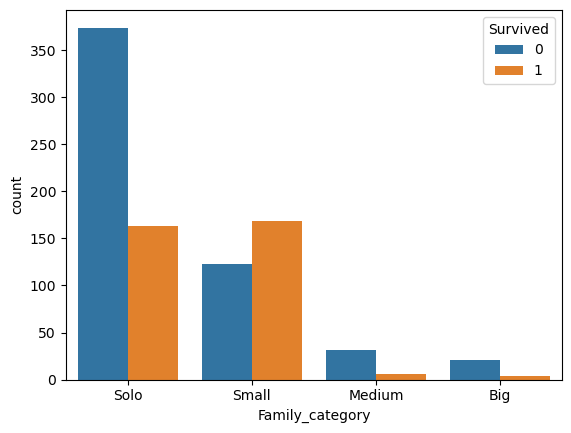

In [87]:
sns.countplot(x = 'Family_category', data = data, hue = 'Survived')

### Data Wrangling

In [88]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_category']
features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_category']


#### Missing Data

In [89]:
data.isna().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_size          0
Family_category      0
dtype: int64

In [90]:
test.isna().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Title                0
Family_size          0
Family_category      0
dtype: int64

<Axes: ylabel='PassengerId'>

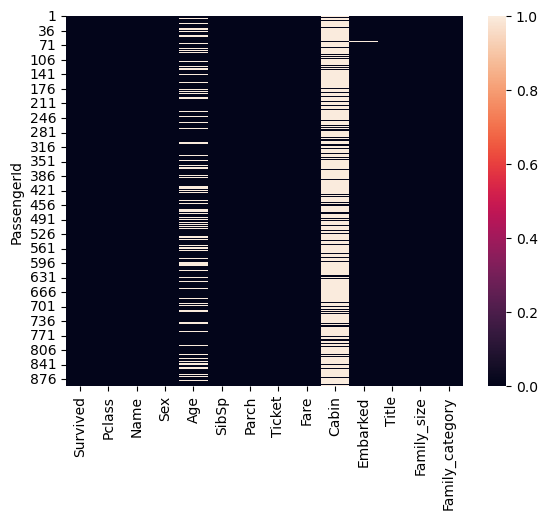

In [91]:
sns.heatmap(data.isna())

In [92]:
data.isna().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_size          0
Family_category      0
dtype: int64

In [93]:
X = data[features_cols]
y = data['Survived']

In [94]:
X_test = test[features_cols]

### Data preprocessing

In [95]:
num_transfomer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transfomer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transfomer, num_features),
    ('cat', cat_transfomer, cat_features),
])

In [97]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_category'])])

In [98]:
X = preprocessor.transform(X)

In [99]:
X_test = preprocessor.transform(X_test)

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

## LogisticRegression

In [101]:
clf = LogisticRegression(solver = 'liblinear', random_state = 0, max_iter = 1000).fit(X_train, y_train)

In [102]:
clf.score(X_val, y_val)

0.8715083798882681

In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred = clf.predict(X_val)
accuracy_score(y_val, pred)

0.8715083798882681

In [104]:
sub_pred = clf.predict(X_test)
df = pd.DataFrame({
    "PassengerId": test_id.values,
    "Survived": sub_pred,
})

df.to_csv("submission_clf.csv", index=False)